In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]


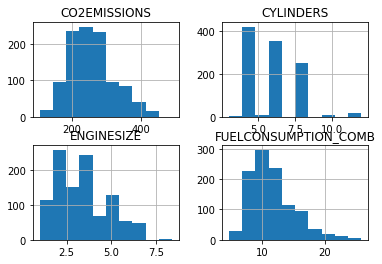

In [8]:
cdf.hist()
plt.show()

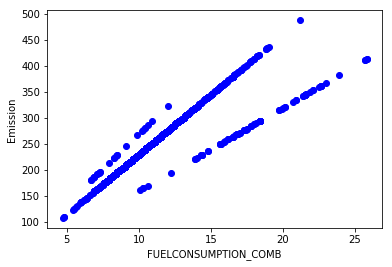

In [10]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [14]:
msk

array([False,  True,  True, ..., False,  True,  True])

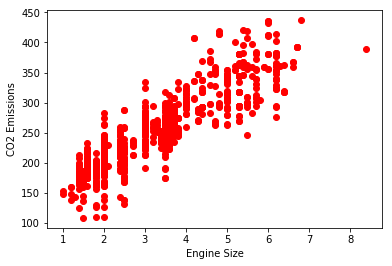

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(train[['ENGINESIZE']], train[['CO2EMISSIONS']])
print(regr.coef_, regr.intercept_)

[[39.29158909]] [124.19963292]


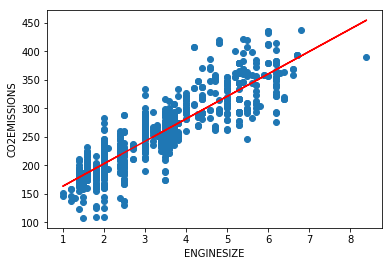

In [28]:
plt.scatter(train[['ENGINESIZE']], train[['CO2EMISSIONS']])
plt.plot(train[['ENGINESIZE']], regr.coef_*train[['ENGINESIZE']] + regr.intercept_, color='r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [23]:
regr2 = LinearRegression()
train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])

regr2.fit(train_x, train_y)
print(regr2.coef_, regr.intercept_)

[[39.29158909]] [124.19963292]


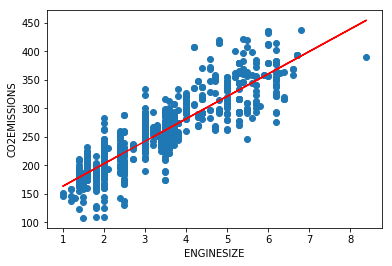

In [27]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(train_x, regr2.coef_*train_x + regr2.intercept_, color='r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [39]:
from sklearn.metrics import r2_score
Yhat = regr2.predict(test[['ENGINESIZE']])

MSE = np.mean((Yhat - test[['CO2EMISSIONS']])**2)
MAE = np.mean(np.absolute(Yhat - test[['CO2EMISSIONS']]))
R2 = r2_score(test[['CO2EMISSIONS']], Yhat)

print("Mean absolute error: %.2f \n" % MAE)
print("Mean sqaure error: %.2f \n" % MSE)
print("R squared: %.2f" % R2)


Mean absolute error: 25.78 

Mean sqaure error: 1134.33 

R squared: 0.72
